In [1]:
import pandas as pd

In [2]:
from functions.cleaning import cleaningRetailOrderHistDF
from functions.parsing import parseRetailOrderHistDtypes

In [3]:
RetailOrderHistDF = pd.read_csv("D:\ML wing\Retail.OrderHistory.2.csv")

In [4]:
#original shape
RetailOrderHistDF.shape

(30, 27)

In [5]:
RetailOrderHistDF['Shipping Charge']=RetailOrderHistDF['Shipping Charge'].astype(float)

In [6]:
RetailOrderHistDF = parseRetailOrderHistDtypes(cleaningRetailOrderHistDF(RetailOrderHistDF))

In [7]:
RetailOrderHistDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Website                         30 non-null     object             
 1   Order ID                        30 non-null     object             
 2   Order Date                      30 non-null     datetime64[ns, UTC]
 3   Purchase Order Number           0 non-null      float64            
 4   Currency                        30 non-null     object             
 5   Unit Price                      30 non-null     float64            
 6   Unit Price Tax                  30 non-null     float64            
 7   Shipping Charge                 30 non-null     float64            
 8   Total Discounts                 30 non-null     float64            
 9   Total Owed                      30 non-null     float64            
 10  Shipment Item Su

In [8]:
from functions.average import averageSpending,monthly_spend

In [9]:
average_spend=averageSpending(RetailOrderHistDF)
average_spend

402.84

In [10]:
monthly_spendigns=monthly_spend(RetailOrderHistDF)
monthly_spendigns

Order Date
August       605.177778
February     369.000000
July         339.750000
June         477.500000
May          175.666667
October      749.000000
September    130.666667
Name: Total Owed, dtype: float64

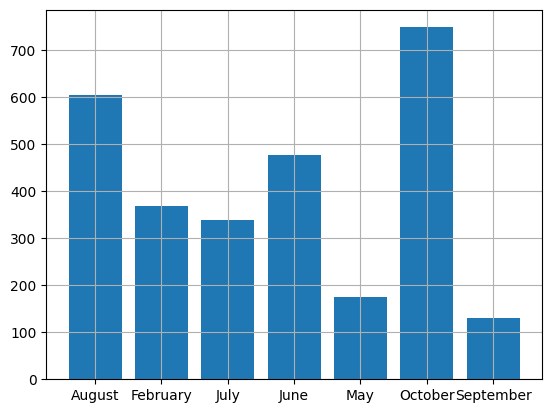

In [11]:
from matplotlib import pyplot as plt
plt.bar(x=monthly_spendigns.index,height=monthly_spendigns)
plt.grid()